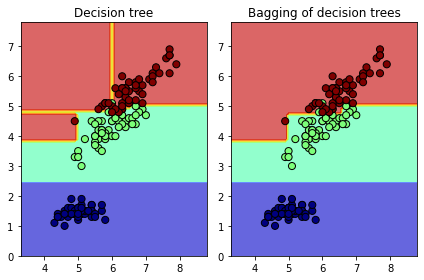

In [2]:
# 배깅
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier # 앙상블에 배깅

iris = load_iris( ) #아이리스 데이터 가져오기
X, y = iris.data[:, [0, 2]], iris.target # X에는 4개의 속성값이 있는데 첫번째, 세번째 속성값을 가져온다, y는 타겟.

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y) # 결정트리. 학습까지(X는 입력 y는 출력)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=4), # 배깅. 결정트리를 만들어서 배깅을 한다(모델). 깊이가 4인 트리를 50개 만들어서 사용.학습까지(X는 입력 y는 출력)
                                  n_estimators=50, random_state=0).fit(X, y) 

# 위치별로 각각의 데이터가 어느 부류에  속하는지 알기위해
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1)) # 메시그리드 사용

plt.subplot(121) # figure에 나뉜 영역 중 서브플롯을 추가해준다.
# 결정트리 사용한 모델
Z1 = model1.predict(np.c_[xx.ravel( ), yy.ravel( )]).reshape(xx.shape) # 모델1 주어진 위치에대한 범주값이 어디에 속하는지.
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)# 등고선 그리기
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k") # 위치 점으로 출력
plt.title("Decision tree") # 그래프 이름
plt.subplot(122) # figure에 나뉜 영역 중 서브플롯을 추가해준다.
# 배깅을 사용해 결정트리 50개 사용
Z2 = model2.predict(np.c_[xx.ravel( ), yy.ravel( )]).reshape(xx.shape) # 모델2 주어진 위치에대한 범주값이 어디에 속하는지.
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet) # 등고선 그리기
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet,edgecolors="k") # 위치 점으로 표현
plt.title("Bagging of decision trees") # 그래프 이름
plt.tight_layout() # 자동으로 명시된 여백에 관련된 서브플롯 파라미터를 조정
plt.show()# 그래프를 보여준다

In [3]:
# Random Forest
import pandas as pd 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier # 앙상블 안에 랜덤 포레스트가 있음
from sklearn import metrics # metrics.accuracy_score 정확도 계산

iris = datasets.load_iris() # 아이리스 데이터 가져오기
print('Class names :', iris.target_names) # 클래스 이름
print('target : [O:setosa, 1:versicolor, 2:virginica]') # 타켓
print('No. of Data :', len(iris.data)) # 아이리스 데이터 길이
print('Feature names :', iris.feature_names) # 각 특성을 설명하는 문자열 리스트

data = pd.DataFrame ( { # 데이터 프레임 생성. 아래 값을 레코드로 가진다.
     'sepal length': iris.data[:, 0], 'sepal width': iris.data[:, 1], 'petal length': iris.data[:, 2], 
     'petal width': iris.data[:, 3], 'species': iris.target }
)

print(data.head()) # 다섯개 출력

x = data[['sepal length', 'sepal width', 'petal length', 'petal width']] #다음 값들이 입력으로 사용됨
y = data['species'] # 다음 값이 출력이 됨
# x_train: 학습데이터(입력), y_train: 학습데이터(출력), x_test: 테스트데이터(입력), y_test:테스트데이터(출력)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 테스트데이터와 학습데이터로 나누는데 테스트데이터는 30%이다.
print("No. of training data: ", len(x_train)) # 학습데이터의 길이 출력 150개중 75%는 105개
print("No. of test data:", len(y_test)) # 테스트데이터의 길이 출력 150개중 30%는 45개

forest = RandomForestClassifier(n_estimators= 100) # 랜덤 포레스트 모델 생성
forest.fit(x_train, y_train) # 학습 데이터로 학습

y_pred = forest.predict(x_test) # 추론은 학습데이터의 입력데이터로
print('Accuracy :', metrics.accuracy_score(y_test, y_pred))# 참값과 기대값을 출럭한다. 정확도 비교

Class names : ['setosa' 'versicolor' 'virginica']
target : [O:setosa, 1:versicolor, 2:virginica]
No. of Data : 150
Feature names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
No. of training data:  105
No. of test data: 45
Accuracy : 0.9333333333333333


In [5]:
# Bagging Regression
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_boston 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import BaggingRegressor # 앙상블안에 배깅 회귀
from sklearn.tree import DecisionTreeRegressor # 결정트리회귀모델 사용
import matplotlib.pyplot as pit 

# 보스턴 집 값에 대한 데이터
boston = load_boston() #데이터 불러오기
data = pd.DataFrame(boston.data) # 데이터 프레임 생성
data.columns = boston.feature_names # 열을 특성으로 설정
data['PRICE'] = boston.target # 출력값을 타겟값으로
print(data.head()) # 5개 출력
X, y = data.iloc[:,:-1],data.iloc[:,-1] # 데이터 추출

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) # 데이터의 20%는 테스트 데이터로 사용한다.
bag = BaggingRegressor(base_estimator = DecisionTreeRegressor(), n_estimators = 10, # 배깅 회귀 모델 만들기. 결정트리를 사용한 회귀모델을 10개사용.
      max_features=1.0, bootstrap_features=False, random_state=0) 
bag.fit(X_train,y_train) # 모델 학습
preds = bag.predict(X_test) #모델 예측
rmse = np.sqrt(mean_squared_error(y_test, preds)) # 오차의 제곱값의 평균의 제곱근을 구함
print("RMSE: %f" % (rmse)) # 출력

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
RMSE: 4.555474


In [6]:
# AdaBoost -분류
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import AdaBoostClassifier # 앙상블안에 adaboost분류
from sklearn import metrics

iris = datasets.load_iris()# 아이리스 데이터 불러오기
X = iris.data # 입력
y = iris.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 테스트 데이터 30% 사용

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1) # adaBoost분류로 모델 생성. 50개.
model = abc.fit(X_train, y_train) # 모델 학습

y_pred = model.predict(X_test) # 모델 예측
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) # 정확도 구하기. 참값과 기대값 이용

Accuracy: 0.9555555555555556


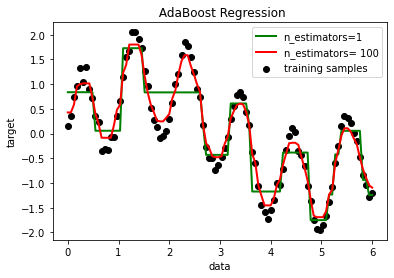

In [7]:
# AdaBoost -회귀
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor # 결정트리 사용
from sklearn.ensemble import AdaBoostRegressor # 앙상블에 AdaBoost회귀 사용

# 데이터 만들기
rng = np.random.RandomState(1) # 특정 seed를 가지는 np.random.RandomState()를 만들어주고, 여기서부터 이 object에 접근하여 난수를 생성
X = np.linspace(0, 6, 100)[:, np.newaxis] # Linearly Spaced (start, stop, num)
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0]) # 다차원 배열을 1차원으로 만든다.

regr_1= DecisionTreeRegressor(max_depth=4) # 모델1: 결정트리. 깊이는 4
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=rng) # 모델2: 깊이 4인 결정트리 100개를 이용해 AdaBoost 회귀모델 생성

regr_1.fit(X, y) # 모델 1 학습
regr_2.fit(X, y) # 모델 2 학습
y_1 = regr_1.predict(X) # 모델 1 예측
y_2 = regr_2.predict(X) # 모델 2 예측

# 결과 출력
plt.figure() # 새로운 figure 생성
plt.scatter(X, y, c="k", label="training samples") # 샘플 점으로 출력
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2) # 결정트리 1개 사용
plt.plot(X, y_2, c="r", label="n_estimators= 100", linewidth=2)  # 100개모델 사용한 것
plt.xlabel("data") # x축 값
plt.ylabel("target") # y축 값
plt.title( " AdaBoost Regression") # 그래프 이름 
plt.legend() # 하나의 그래프 안에 위치하도록 설정
plt.show() # 그래프 출력

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]
R2 sq: 0.9800347273281851
Mean squared error: 5.90
Test Variance score: 0.91
Mean squared error: 5.90
Test Variance score: 0.91


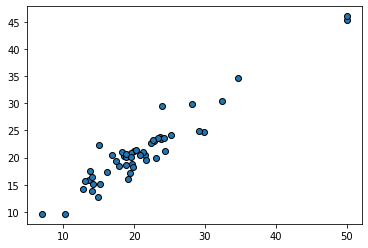

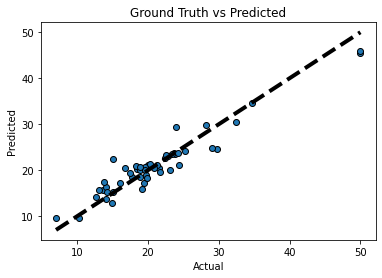

In [8]:
# Gradient Boosting 기반 회귀
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import ensemble # 앙상블 사용
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_predict

boston=datasets.load_boston() # 보스턴 집값 데이터 가져오기
print(boston.data.shape, boston.target.shape) #(506, 13) (506, )
print(boston.feature_names) # 특징 문자열 출력boston=datasets.load_boston() # 보스턴 집값 데이터 가져오기
print(boston.data.shape, boston.target.shape) #(506, 13) (506, )
print(boston.feature_names) # 특징 문자열 출력

data=pd.DataFrame(boston.data, columns=boston.feature_names) # 보스턴 데이터를 이용해 열이 속성인 데이터 프레임 생성
data=pd.concat([data, pd.Series(boston.target, name='MEDV')], axis=1)# 데이터의 속성 형태가 동일한 데이터셋끼리 합친다.
print(data.head()) # 5개 출력

X=data.iloc[:,:-1] # 입력데이터 추출
y=data.iloc[:,-1] # 출력 데이터 추출
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10, # 테스트 데이터 10% 사용. 테스트데이터와 학습데이터로 나누기.
                                                                        random_state=42, shuffle=True)

params={'n_estimators':500, 'max_depth':4, 'min_samples_split':2, 'learning_rate':0.01, 'loss':'ls'} #GradientBoostingRegressor모델 생성을 위한 결정트리의 조건
model=ensemble.GradientBoostingRegressor(**params) # GradientBoostingRegressor 모델 생성
model.fit(x_training_set, y_training_set) # 모델 학습
model_score=model.score(x_training_set, y_training_set) # score를 이용해 성능평가
print('R2 sq:', model_score) # 성능 출력

y_predicted=model.predict(x_test_set) # 모델 예측
print("Mean squared error: %.2f" % mean_squared_error(y_test_set,y_predicted)) # 평균 제곱 오차 회귀 손실하는 함수
print('Test Variance score: %.2f' % r2_score(y_test_set,y_predicted)) # R^2 (결정 계수) 회귀 점수 함수

fig,ax=plt.subplots() # 서브플롯 추가
ax.scatter(y_test_set, y_predicted, edgecolors=(0,0,0)) # 점으로 표현. 참값에대한 기대값rint('R2 sq:', model_score) # 성능 출력

y_predicted=model.predict(x_test_set) # 모델 예측
print("Mean squared error: %.2f" % mean_squared_error(y_test_set,y_predicted)) # 평균 제곱 오차 회귀 손실하는 함수
print('Test Variance score: %.2f' % r2_score(y_test_set,y_predicted)) # R^2 (결정 계수) 회귀 점수 함수

fig,ax=plt.subplots() # 서브플롯 추가
ax.scatter(y_test_set, y_predicted, edgecolors=(0,0,0)) # 점으로 표현. 참값에대한 기대값
ax.plot([y_test_set.min(),y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4) # 2차원 선 플롯을 생성
ax.set_xlabel('Actual') # x축 이름
ax.set_ylabel('Predicted') # y축 이름
ax.set_title("Ground Truth vs Predicted") # 그래프 이름
plt.show() # 그래프 출력


In [9]:
# Gradient Boosting 기반 분류
from sklearn.datasets import make_hastie_10_2 
from sklearn.ensemble import GradientBoostingClassifier 
import matplotlib.pyplot as plt

X, y = make_hastie_10_2(random_state=0) # 데이터 생성
X_train, X_test = X[:2000], X[2000:] # 입력값
y_train, y_test = y[:2000], y[2000:] #출력값
print(X.shape, y.shape) # X,y 형태 출력
print(X[0:5,:]) # X출력
print(y[0:5]) # y출력

clf = GradientBoostingClassifier(n_estimators= 100, learning_rate=0.1, max_depth=1, random_state=0) # Gradient Boosting 분류 모델 생성
clf.fit(X_train, y_train) # 모델 학습
print("Accuracy score (training): {0:.3f}".format(clf.score(X_train, y_train))) # 학습데이터에 대한 점수 출력
print("Accuracy score (testing): {0:.3f}".format(clf.score(X_test, y_test))) # 테스트데이터에 대한 점수 출력

(12000, 10) (12000,)
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323  0.33367433
   1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462 -1.45436567
   0.04575852 -0.18718385  1.53277921  1.46935877]
 [ 0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
   1.23029068  1.20237985 -0.38732682 -0.30230275]
 [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218 -0.4380743
  -1.25279536  0.77749036 -1.61389785 -0.21274028]]
[ 1. -1.  1. -1.  1.]
Accuracy score (training): 0.879
Accuracy score (testing): 0.819


In [10]:
# XGBoosting 기반 회귀

import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb # 설치해야함.

boston=load_boston() # 보스턴 집값 정보 가져오기
data=pd.DataFrame(boston.data) # 데이터 프레임 생성
data.columns=boston.feature_names # 열을 특성으로 사용
data['PRICE']=boston.target # 가격은 타겟
print(data.head()) # 5개 출력
X,y=data.iloc[:,:-1],data.iloc[:,-1] # 데이터 추출

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=123) # 학습데이터와 테스트데이터로 나누기. 20%는 테스트데이터
xg_reg=xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3,
                        learning_rate=0.1, max_depth=5, alpha=10,n_estimators=10) # XGB 회귀 모델
xg_reg.fit(X_train, y_train) # 모델 학습
preds=xg_reg.predict(X_test) # 모델 예측
rmse=np.sqrt(mean_squared_error(y_test, preds)) # 오차의 제곱값의 평균의 제곱근을 구함
print("RMSE: %f" % (rmse)) # 출력

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
RMSE: 10.449300


[[16  0  0]
 [ 0 12  2]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.86      0.89        14
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



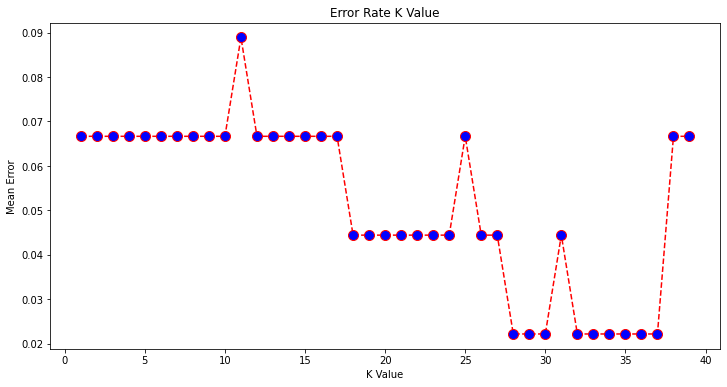

In [11]:
# KNN기반 분류
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

iris = datasets.load_iris() # 아이리스 데이터 가져오기
X = iris.data # 입력
y = iris.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 테스트데이터로 30%, 학습데이터로 70% 사용
scaler = StandardScaler() # 정규화 (0,1)
scaler.fit(X_train) # 학습
X_train = scaler.transform(X_train) #  학습데이터의 입력값의 속성값 정규화
X_test = scaler.transform(X_test)# 테스트데이터의 입력값의 속성값 정규화

classifier = KNeighborsClassifier(n_neighbors = 5) # KNN 분류기
classifier.fit(X_train, y_train) # 모델 학습
y_pred = classifier.predict(X_test) # 모델 예측

print(confusion_matrix(y_test, y_pred)) # 혼동행렬 생성
print(classification_report(y_test, y_pred)) # 참값과 결과값으로 정밀도와 재현율을 평가

error = [] 
for i in range(1, 40): # k값의 범위
  knn = KNeighborsClassifier(n_neighbors=i) # KNN분류 모델 생성
  knn.fit(X_train, y_train) # 모델 학습
  pred_i = knn.predict(X_test) # 예측
  error.append(np.mean(pred_i != y_test)) # 예측값과 참값의 차이의 비율(오차율)

plt.figure(figsize=(12,6)) # figure 생성
plt.plot(range(1,40), error, color = 'red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10) # error값을 그래프에 그린다
plt.title('Error Rate K Value') # 그래프 이름
plt.xlabel('K Value') # x축 값 이름
plt.ylabel('Mean Error') # y축 값 이름
plt.show() # 그래프 그리기

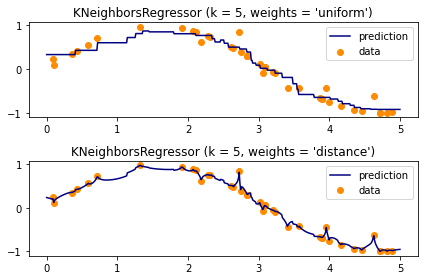

In [12]:
# KKN기반 회귀
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0) # 무작위로 데이터 생성
X = np.sort(5*np.random.rand(40, 1), axis=0) # 정렬
T = np.linspace(0, 5, 500)[:, np.newaxis] # Linearly Spaced
y = np.sin(X).ravel() # 다차원을 1차원 배열로
y[::5] += 1*(0.5-np.random.rand(8))

n_neighbors = 5 # 이웃 개수 
for i, weights in enumerate(['uniform', 'distance']): # uniform: 평균, distance: 가까운 건  많이 먼건 적게
  knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights) # 회귀!! (neighbors와 weight(가중치)은 조절 가능)
  y_=knn.fit(X,y).predict(T) # 모델 학습

  plt.subplot(2, 1, i+1) # 서브 플롯 생성
  plt.scatter(X, y, color='darkorange', label='data') # 점으로 표시
  plt.plot(T, y_, color='navy', label='prediction') # 예측값을 선으로 연결해 표시
  plt.axis('tight') # 축을 딱 맞게
  plt.legend() # 하나의 그래프 안에 위치하도록 설정
  plt.title("KNeighborsRegressor (k = %i, weights = '%s')"%(n_neighbors, weights))

plt.tight_layout() # 자동으로 명시된 여백에 관련된 서브플롯 파라미터를 조정
plt.show()# 그래프 출력